## Exercise Set 2 for OSM 

### Dynamic Programming with John Stachurski

Exercises for the [OSM](https://bfi.uchicago.edu/osm) bootcamp dynamic programming section.

We will use the following libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import quantecon as qe

### Exercise 1

Consider the setting of the [stochastic optimal growth model](https://lectures.quantecon.org/py/optgrowth.html), with the same notation and same assumptions on the primitives $u$, $f$, $\beta$ and $\phi$. 

Let $\mathscr C$ be all continuous bounded functions on $\mathbb R_+$.

Let $\sigma \in \Sigma$ be any feasible policy and let $U$ be the operator from $\mathscr C$ to itself defined by

$$ Uw(y) = u(\sigma(y)) + \beta \int w(f(y - \sigma(y))z) \phi(dz) \qquad (y \in \mathbb R_+)$$

Prove that $U$ is a contraction mapping with respect to the supremum distance.  Argue that the unique fixed point of $U$ in $\mathscr C$ is $v_\sigma$.

("Argue" means provide a sketch of a proof that contains the key ideas, plus some intuition.  Or give a complete, formal proof, if you can.)

### Exercise 2

Notation and concepts continue from exercise 2.

Use the fact you proved in exercise 2, combined with piecewise linear interpolation method we used for the Bellman operator, to compute and plot good approximations of the value $v_\sigma$ of the policies

* $\sigma_1(y) = 0.95 y$
* $\sigma_2(y) = H(y) y$ where $H$ is the cdf of the lognormal $LN(0, 0.5)$ distribution.

For the latter use `scipy.stats.lognorm.cdf(y, 0.5)`

For the primitives, use the default specification in the `LogLinearOG` class from the [stochastic optimal growth model lecture](https://lectures.quantecon.org/py/optgrowth.html).

Plot your results, choosing grid and plotting dimensions to best illustrate the two functions.  Based on the plot alone, argue that neither of these policies is an optimal policy.

In [23]:
import numpy as np
from scipy.optimize import fminbound


def bellman_operator(w, grid, beta, u, f, shocks, c_func, Tw=None):
    """
    The approximate Bellman operator, which computes and returns the
    updated value function Tw on the grid points.  An array to store
    the new set of values Tw is optionally supplied (to avoid having to
    allocate new arrays at each iteration).  If supplied, any existing data in 
    Tw will be overwritten.

    Parameters
    ----------
    w : array_like(float, ndim=1)
        The value of the input function on different grid points
    grid : array_like(float, ndim=1)
        The set of grid points
    beta : scalar
        The discount factor
    u : function
        The utility function
    f : function
        The production function
    shocks : numpy array
        An array of draws from the shock, for Monte Carlo integration (to
        compute expectations).
    Tw : array_like(float, ndim=1) optional (default=None)
        Array to write output values to

    """
    # === Apply linear interpolation to w === #
    w_func = lambda x: np.interp(x, grid, w)
    
    if Tw is None:
        Tw = np.empty_like(w)

    # == set Tw[i] = max_c { u(c) + beta E w(f(y  - c) z)} == #
    for i, y in enumerate(grid):
        def objective(c):
            return - u(c_func(y)) - beta * np.mean(w_func(f(y - c_func(y)) * shocks))
        c_star = fminbound(objective, 1e-10, y)
        Tw[i] = - objective(c_star)


    return Tw


In [35]:
from quantecon import compute_fixed_point

grid_max = 4
grid_size = 200
shock_size = 250

grid = np.linspace(1e-5, grid_max, grid_size)
shocks = np.exp(0 + 0.1 * np.random.randn(shock_size))

Tw = np.empty(len(grid))
initial_w = 5* np.log(grid)

c_func_1 = lambda y: 0.95*y
c_func_2 = lambda y: scipy.stats.lognorm.cdf(y,0.5)*y

T = lambda w: bellman_operator(w,
                               grid,
                               0.96,
                               np.log,
                               lambda k: k**0.4,
                               shocks,
                               c_func_1)

v_star_approx = compute_fixed_point(T, initial_w,
                                    error_tol=1e-5,
                                    max_iter=500,
                                    verbose=2,
                                    print_skip=10,
                                    method='iteration')


Iteration    Distance       Elapsed (seconds)
---------------------------------------------
10           1.267e+00      1.894e+00         
20           7.756e-01      3.772e+00         
30           5.070e-01      5.623e+00         
40           3.359e-01      7.559e+00         
50           2.232e-01      9.610e+00         
60           1.484e-01      1.160e+01         
70           9.864e-02      1.361e+01         
80           6.558e-02      1.564e+01         
90           4.360e-02      1.764e+01         
100          2.899e-02      1.958e+01         
110          1.927e-02      2.154e+01         
120          1.281e-02      2.351e+01         
130          8.518e-03      2.561e+01         
140          5.663e-03      2.764e+01         
150          3.765e-03      2.956e+01         
160          2.503e-03      3.146e+01         
170          1.664e-03      3.333e+01         
180          1.106e-03      3.522e+01         
190          7.355e-04      3.718e+01         
200          4.

In [29]:
import scipy

T2 = lambda w: bellman_operator(w,
                               grid,
                               0.96,
                               np.log,
                               lambda k: k**0.4,
                               shocks,
                               c_func_2)

v_star_approx_2 = compute_fixed_point(T2, initial_w,
                                     error_tol=1e-5,
                                     max_iter=500,
                                     verbose=2,
                                     print_skip=10,
                                     method='iteration')

Iteration    Distance       Elapsed (seconds)
---------------------------------------------
10           3.496e-01      1.054e+01         
20           2.324e-01      2.139e+01         
30           1.545e-01      3.305e+01         
40           1.027e-01      4.588e+01         
50           6.829e-02      5.698e+01         
60           4.540e-02      7.224e+01         
70           3.018e-02      9.019e+01         
80           2.007e-02      1.009e+02         
90           1.334e-02      1.111e+02         
100          8.870e-03      1.213e+02         
110          5.897e-03      1.316e+02         
120          3.921e-03      1.418e+02         
130          2.607e-03      1.525e+02         
140          1.733e-03      1.627e+02         
150          1.152e-03      1.728e+02         
160          7.659e-04      1.832e+02         
170          5.092e-04      1.937e+02         
180          3.385e-04      2.042e+02         
190          2.251e-04      2.143e+02         
200          1.

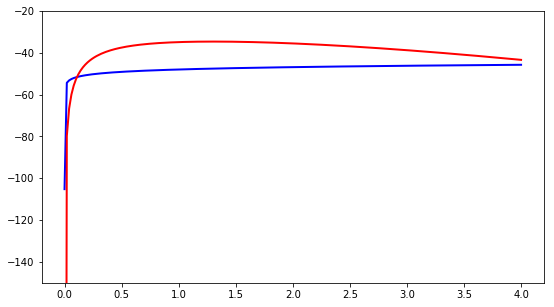

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9,5))
ax.set_ylim(-150, -20)
ax.plot(grid, v_star_approx, lw=2, color='b', label='0.95y')
ax.plot(grid, v_star_approx_2, lw=2, color='r', label='H(y)y')
plt.show()

^Highly doubt this is correct...